In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [30]:
df.shape

(25, 2)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [32]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


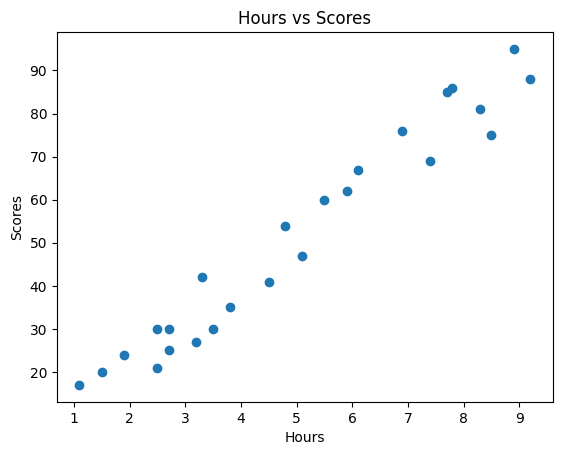

In [33]:
plt.scatter(x = df.Hours, y = df.Scores)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
plt.show()

In [34]:
df.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [35]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [36]:
# split the data into train and test

X = df.drop("Scores", axis=1)
y = df.drop("Hours", axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20, 1)
(5, 1)


In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
print(lr.coef_)
print(lr.intercept_)

[[9.91065648]]
[2.01816004]


In [39]:
lr.predict([[7]])[0][0].round(2)

71.39

In [40]:
y_pred = lr.predict(X_test)
y_pred

# df3 = pd.DataFrame({'Actual': y_test.Scores, 'Predicted': y_pred[:,0]})
# df3

df3 = pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ['Hours', 'Actual', 'Predicted'])
df3

,Hours,Actual,Predicted
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


In [41]:
lr.score(X_test, y_test)

0.9454906892105355

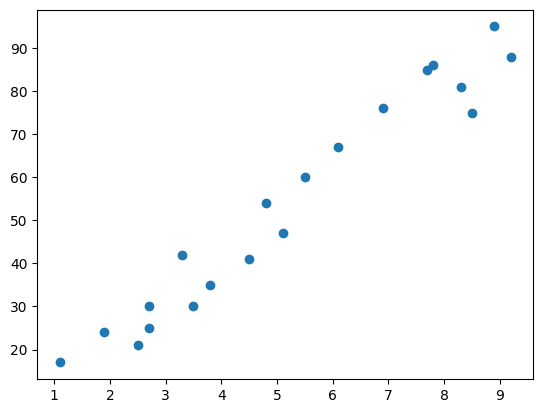

In [42]:
plt.scatter(X_train, y_train)

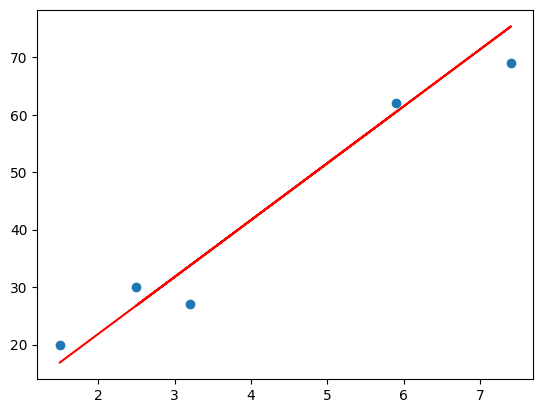

In [43]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')

In [44]:
marks = int(input("Enter the number of hours studied: "))
print("Predicted Score: ", lr.predict([[marks]])[0][0].round(2))

Predicted Score:  61.48
